In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn. linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, confusion_matrix,\
precision_recall_curve, f1_score,roc_curve, log_loss,SCORERS, fbeta_score, make_scorer

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv('Churn_Eng_Data.csv', index_col = 0)

In [6]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,New_Balance,Exited
RowNumber,,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,Zero,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,Mid,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,High,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,Zero,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,High,0


In [7]:
gender = pd.get_dummies(df['Gender'], drop_first=True)
geography = pd.get_dummies(df['Geography'], drop_first=True)
new_balance = pd.get_dummies(df['New_Balance'], drop_first=True)

In [8]:
X = df.iloc[:,2:13]
y = df.iloc[:,13]

In [9]:
X = pd.concat([X, gender, geography, new_balance], axis=1)
X = X.drop(['Gender', 'Geography', 'Balance', 'New_Balance'], axis = 1)

In [10]:
X.head()

,CreditScore,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Male,Germany,Spain,Mid,Zero
RowNumber,,,,,,,,,,,,
1,619,42,2,1,1,1,101348.88,0,0,0,0,1
2,608,41,1,1,0,1,112542.58,0,0,1,1,0
3,502,42,8,3,1,0,113931.57,0,0,0,0,0
4,699,39,1,2,0,0,93826.63,0,0,0,0,1
5,850,43,2,1,1,1,79084.10,0,0,1,0,0


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=711, stratify =y)

In [12]:
Scaler = StandardScaler()

X_trainsc = Scaler.fit_transform(X_train)
X_testsc = Scaler.transform(X_test)

## Baseline Dummy Classifier

In [13]:
dummy_class = DummyClassifier(strategy = 'constant', constant = 1)
dummy_class.fit(X_trainsc, y_train)

dummy_train_score =dummy_class.score(X_trainsc,y_train)
dummy_test_score = dummy_class.score(X_testsc, y_test)

print("Dummy Training Score: {:.2f}%".format(100*dummy_train_score))
print("Dummy Test Score: {:.2f}%".format(100*dummy_test_score))

Dummy Training Score: 20.38%
Dummy Test Score: 20.35%


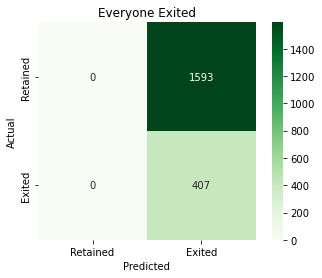

In [14]:
dummy_confusion = confusion_matrix(y_test, dummy_class.predict(X_testsc))
sns.heatmap(dummy_confusion, cmap="Greens", annot=True, square=True,fmt='g', 
            xticklabels=['Retained', 'Exited'], 
            yticklabels=['Retained', 'Exited'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Everyone Exited');
plt.savefig("Everyone_Exited.png")

In [15]:
dummy_class = DummyClassifier()
dummy_class.fit(X_trainsc, y_train)

dummy_train_score =dummy_class.score(X_trainsc,y_train)
dummy_test_score = dummy_class.score(X_testsc, y_test)

print("Dummy Training Score: {:.2f}%".format(100*dummy_train_score))
print("Dummy Test Score: {:.2f}%".format(100*dummy_test_score))

Dummy Training Score: 79.62%
Dummy Test Score: 79.65%


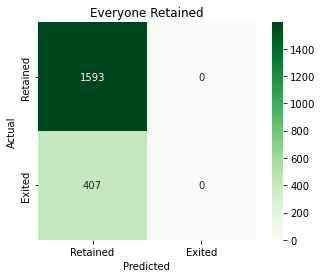

In [16]:
dummy_confusion = confusion_matrix(y_test, dummy_class.predict(X_testsc))
sns.heatmap(dummy_confusion, cmap="Greens", annot=True, square=True,fmt='g', 
            xticklabels=['Retained', 'Exited'], 
            yticklabels=['Retained', 'Exited'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Everyone Retained');
plt.savefig("Everyone_Retained.png")

In [17]:
fpr_dum, tpr_dum, thresholds_dum = roc_curve(y_test, dummy_class.predict_proba(X_testsc)[:,1])

## K Nearest Neighbors 

**- GridSearchCV**

In [18]:
knn = KNeighborsClassifier()

In [19]:
k_range = np.arange(1,25)
weight_options = ['uniform', 'distance']
fbeta_scorer = make_scorer(fbeta_score, beta=0.25)

In [20]:
param_grid_knn = dict(n_neighbors = k_range, weights=weight_options)
print(param_grid_knn)

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24]), 'weights': ['uniform', 'distance']}


In [21]:
gridcv_knn = GridSearchCV(knn, param_grid_knn, cv=10, scoring = fbeta_scorer)
gridcv_knn.fit(X_trainsc, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24]),
                         'weights': ['uniform', 'distance']},
             scoring=make_scorer(fbeta_score, beta=0.25))

In [22]:
df_cv_knn = pd.DataFrame(gridcv_knn.cv_results_)
df_cv_knn.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007668,0.001334,0.029025,0.000937,1,uniform,"{'n_neighbors': 1, 'weights': 'uniform'}",0.409176,0.466717,0.496599,0.484911,0.488140,0.470280,0.504950,0.427315,0.510865,0.473891,0.473284,0.030968,46
1,0.007066,0.000029,0.018262,0.000333,1,distance,"{'n_neighbors': 1, 'weights': 'distance'}",0.409176,0.466717,0.496599,0.484911,0.488140,0.470280,0.504950,0.427315,0.510865,0.473891,0.473284,0.030968,46
2,0.007046,0.000079,0.034630,0.000546,2,uniform,"{'n_neighbors': 2, 'weights': 'uniform'}",0.506775,0.626062,0.612463,0.616744,0.570470,0.621779,0.577904,0.594536,0.632558,0.537313,0.589660,0.039485,41
3,0.007038,0.000041,0.024299,0.000470,2,distance,"{'n_neighbors': 2, 'weights': 'distance'}",0.409176,0.466717,0.496599,0.484911,0.488140,0.470280,0.504950,0.427315,0.510865,0.473891,0.473284,0.030968,46
4,0.007204,0.000427,0.039750,0.002387,3,uniform,"{'n_neighbors': 3, 'weights': 'uniform'}",0.514915,0.608696,0.555102,0.535203,0.517042,0.551351,0.566367,0.512427,0.520096,0.578559,0.545976,0.030392,44


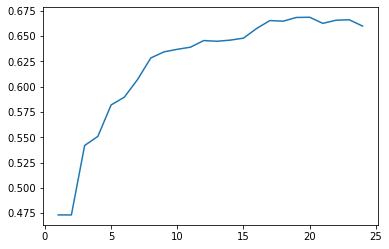

In [23]:
y_distance = df_cv_knn[df_cv_knn['param_weights'] == 'distance']['mean_test_score']
x = k_range
plt.plot(x, y_distance)

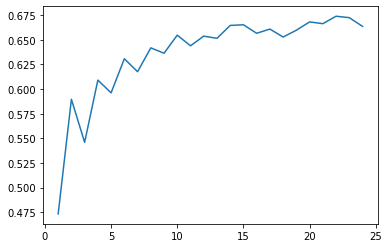

In [24]:
y_uniform = df_cv_knn[df_cv_knn['param_weights'] == 'uniform']['mean_test_score']
x = k_range
plt.plot(x, y_uniform)

In [25]:
#plt.plot(df['param_n_neighbors'])

In [26]:
print("Best params: ", gridcv_knn.best_params_)
print("Best estimator: ", gridcv_knn.best_estimator_)
print("Best score: ", gridcv_knn.best_score_)

Best params:  {'n_neighbors': 22, 'weights': 'uniform'}
Best estimator:  KNeighborsClassifier(n_neighbors=22)
Best score:  0.6739550835052677


In [27]:
knn = KNeighborsClassifier(n_neighbors = gridcv_knn.best_params_['n_neighbors'], weights = gridcv_knn.best_params_['weights'])
knn.fit(X_trainsc, y_train)

KNeighborsClassifier(n_neighbors=22)

In [28]:
knn_train_score = knn.score(X_trainsc, y_train)
knn_test_score = knn.score(X_testsc, y_test)
print("KNN Training Score: {:.2f}%".format(100*knn_train_score))
print("KNN Validation Score: {:.2f}%".format(100*knn_test_score))

KNN Training Score: 83.70%
KNN Validation Score: 82.45%


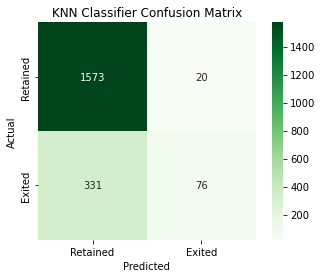

In [29]:
knn_confusion = confusion_matrix(y_test, knn.predict(X_testsc))
sns.heatmap(knn_confusion, cmap="Greens", annot=True, square=True,fmt='g', 
            xticklabels=['Retained', 'Exited'], 
            yticklabels=['Retained', 'Exited'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('KNN Classifier Confusion Matrix');
plt.savefig('KNN_Confusion.png')

In [30]:
knn_fbeta = fbeta_score(y_test, knn.predict(X_testsc), beta=0.25)
knn_precision = precision_score(y_test, knn.predict(X_testsc))
knn_recall = recall_score(y_test, knn.predict(X_testsc))
print("KNN F-Beta:{:.3f} KNN Precision:{:.3f} KNN Recall:{:.3f}".format(knn_fbeta, knn_precision, knn_recall))

KNN F-Beta:0.665 KNN Precision:0.792 KNN Recall:0.187


In [31]:
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, knn.predict_proba(X_testsc)[:,1])

## Logistic Regression

In [32]:
C_range = np.arange(.4,.7,0.01)
param_grid_lr = dict(C = C_range, penalty = ["l1","l2"],  solver = ['lbfgs', 'liblinear', 'sag', 'saga'])

In [33]:
gridcv_lr = GridSearchCV(LogisticRegression(max_iter=100), param_grid_lr, cv=10, scoring = 'accuracy')
gridcv_lr.fit(X_trainsc, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([0.4 , 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 ,
       0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61,
       0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             scoring='accuracy')

In [33]:
df_cv_lr = pd.DataFrame(gridcv_lr.cv_results_)
df_cv_lr.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000350,0.000045,0.000000,0.000000,0.4,l1,lbfgs,"{'C': 0.4, 'penalty': 'l1', 'solver': 'lbfgs'}",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,240
1,0.009621,0.000568,0.000454,0.000350,0.4,l1,liblinear,"{'C': 0.4, 'penalty': 'l1', 'solver': 'libline...",0.81000,0.80750,...,0.82000,0.81500,0.80875,0.82375,0.80125,0.7975,0.8175,0.812500,0.008588,142
2,0.000436,0.000018,0.000000,0.000000,0.4,l1,sag,"{'C': 0.4, 'penalty': 'l1', 'solver': 'sag'}",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,184
3,0.035428,0.001409,0.000323,0.000059,0.4,l1,saga,"{'C': 0.4, 'penalty': 'l1', 'solver': 'saga'}",0.81125,0.80750,...,0.82000,0.81500,0.80875,0.82375,0.80125,0.7975,0.8175,0.812625,0.008560,49
4,0.006214,0.000260,0.000324,0.000152,0.4,l2,lbfgs,"{'C': 0.4, 'penalty': 'l2', 'solver': 'lbfgs'}",0.81000,0.80875,...,0.82125,0.81625,0.80875,0.82375,0.80125,0.7975,0.8175,0.812875,0.008679,8


In [34]:
print("Best params: ", gridcv_lr.best_params_)
print("Best estimator: ", gridcv_lr.best_estimator_)
print("Best score: ", gridcv_lr.best_score_)

Best params:  {'C': 0.6400000000000002, 'penalty': 'l1', 'solver': 'liblinear'}
Best estimator:  LogisticRegression(C=0.6400000000000002, penalty='l1', solver='liblinear')
Best score:  0.8130000000000001


In [82]:
lr = LogisticRegression(C = gridcv_lr.best_params_['C'], max_iter = 100, multi_class='auto', 
                        penalty = gridcv_lr.best_params_['penalty'], solver= gridcv_lr.best_params_['solver'])
lr.fit(X_trainsc, y_train)
print("Logistic Training Score: {:.2f}%".format(100*lr.score(X_trainsc,y_train)))
print("Logistic Validation Score: {:.2f}%".format(100*lr.score(X_testsc,y_test)))

Logistic Training Score: 81.29%
Logistic Validation Score: 80.55%


In [83]:
col = pd.Series(X.columns)
coef_df = pd.DataFrame(lr.coef_.reshape(-1,1), columns=['Coefficients'])
coef_df = pd.concat([coef_df,col], axis=1)
coef_df = coef_df.rename({0:"Features"}, axis =1)
coef_df.sort_values('Coefficients', ascending = False)

,Coefficients,Features
1,0.751063,Age
8,0.336289,Germany
6,0.032484,EstimatedSalary
9,0.019223,Spain
4,-0.005712,HasCrCard
10,-0.026567,Mid
3,-0.026845,NumOfProducts
2,-0.044066,Tenure
0,-0.080105,CreditScore
11,-0.177206,Zero


In [84]:
confusion_matrix(y_test, lr.predict(X_testsc))

array([[1531,   62],
       [ 327,   80]])

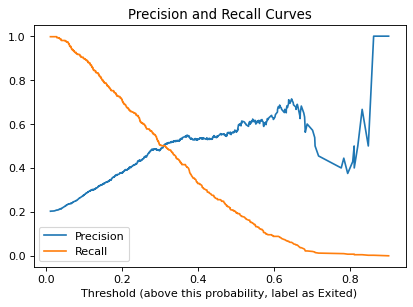

In [85]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, lr.predict_proba(X_testsc)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='Precision')
plt.plot(threshold_curve, recall_curve[1:], label='Recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as Exited)');
plt.title('Precision and Recall Curves');

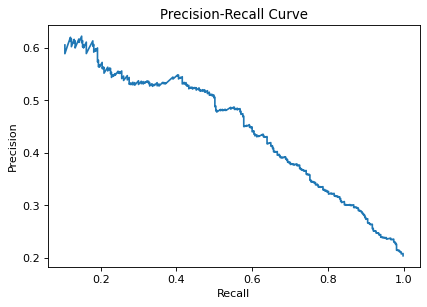

In [86]:
plt.figure(dpi=80)
plt.plot(recall_curve[10:1930], precision_curve[10:1930],label='precision')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve");

**Equal Precision and Recall**

In [87]:
p_series = pd.Series(precision_curve[1:])
r_series = pd.Series(recall_curve[1:])
df_threshold = pd.DataFrame(threshold_curve, columns =['thresh'])

In [88]:
df_threshold = pd.concat([df_threshold, p_series, r_series], axis=1)
df_threshold = df_threshold.rename({0:'precis',1:'recall'}, axis='columns')

In [89]:
result = [z for x, y, z in zip(df_threshold['precis'], df_threshold['recall'], df_threshold['thresh']) if x == y]
result

[0.3090673163697586]

In [90]:
threshold = result[0]

y_predict = (lr.predict_proba(X_testsc)[:,1] > threshold)
print(f"Threshold of {threshold}:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))

Threshold of 0.3090673163697586:
Precision: 0.5012,   Recall: 0.5012


**Max Precision**

In [91]:
max_precis = df_threshold[df_threshold['precis'] == (df_threshold[df_threshold['thresh'].between(.55,.6)]['precis'].max())]
max_precis

,thresh,precis,recall
1938,0.592795,0.639344,0.095823


In [92]:
threshold = max_precis.iloc[0,0]

y_predict = (lr.predict_proba(X_testsc)[:,1] > threshold)
print(f"Threshold of {threshold}:")
print("F-Beta: {:6.4f}, Precision: {:6.4f}, Recall: {:6.4f}".format(fbeta_score(y_test, y_predict,beta=0.25),precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))

Threshold of 0.5927948682531761:
F-Beta: 0.4794, Precision: 0.6393, Recall: 0.0958


In [93]:
def make_confusion_matrix(model, threshold=0.5):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_val) does this automatically with a threshold of 0.5)
    y_predict = (model.predict_proba(X_testsc)[:, 1] >= threshold)
    exited_confusion = confusion_matrix(y_test, y_predict)
    plt.figure(dpi=80)
    sns.heatmap(exited_confusion, cmap="Greens", annot=True, square=True, fmt='d',
           xticklabels=['Retained', 'Exited'],
           yticklabels=['Retained', 'Exited']);
    plt.title('Logistic Regression Confusion Matrix');
    plt.xlabel('Prediction')
    plt.ylabel('Actual')

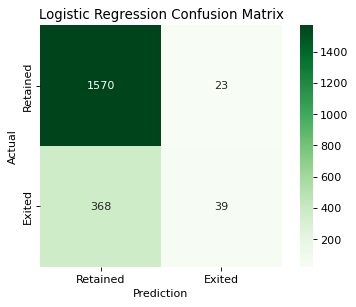

In [94]:
make_confusion_matrix(lr,max_precis.iloc[0,0])
plt.savefig('LR_Confusion.png')

In [95]:
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, lr.predict_proba(X_testsc)[:,1])

## Decision Tree

In [193]:
dc_range = np.arange(2,30)
param_grid_dc = dict(max_depth = dc_range, min_samples_split = range(2,15))
fbeta_scorer = make_scorer(fbeta_score, beta=0.25)

In [194]:
gridcv_dc = GridSearchCV(DecisionTreeClassifier(random_state=711), param_grid_dc, cv=10, scoring = 'precision')
gridcv_dc.fit(X_trainsc, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=711),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'min_samples_split': range(2, 15)},
             scoring='precision')

In [195]:
print("Best params: ", gridcv_dc.best_params_)
print("Best estimator: ", gridcv_dc.best_estimator_)
print("Best score: ", gridcv_dc.best_score_)

Best params:  {'max_depth': 3, 'min_samples_split': 2}
Best estimator:  DecisionTreeClassifier(max_depth=3, random_state=711)
Best score:  0.863554537417804


In [196]:
dc = DecisionTreeClassifier(max_depth = gridcv_dc.best_params_['max_depth'],
                            min_samples_split=gridcv_dc.best_params_['min_samples_split'], random_state = 711)
dc.fit(X_trainsc, y_train)
dc_train_score = dc.score(X_trainsc, y_train)
dc_test_score = dc.score(X_testsc,y_test)
print("DC Training Score: {:.2f}%".format(100*dc_train_score))
print("DC Test Score: {:.2f}%".format(100*dc_test_score))

DC Training Score: 84.25%
DC Test Score: 82.95%


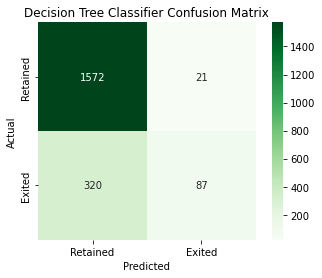

In [197]:
dc_confusion = confusion_matrix(y_test, dc.predict(X_testsc))
sns.heatmap(dc_confusion, cmap="Greens", annot=True, square=True,fmt='g', 
            xticklabels=['Retained', 'Exited'], 
            yticklabels=['Retained', 'Exited'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Classifier Confusion Matrix');
plt.savefig('DC_Confusion.png')

In [198]:
dc_fbeta = fbeta_score(y_test, dc.predict(X_testsc), beta=0.25)
dc_precision = precision_score(y_test, dc.predict(X_testsc))
dc_recall = recall_score(y_test, dc.predict(X_testsc))
print("DC F-Beta:{:.3f} DC Precision:{:.3f} DC Recall:{:.3f}".format(dc_fbeta, dc_precision, dc_recall))

DC F-Beta:0.693 DC Precision:0.806 DC Recall:0.214


In [186]:
fpr_dc, tpr_dc, thresholds_dc = roc_curve(y_test, dc.predict_proba(X_testsc)[:,1])

In [187]:
col = pd.Series(X.columns)
coef_df = pd.DataFrame(dc.feature_importances_.reshape(-1,1), columns=['Coefficients'])
coef_df = pd.concat([coef_df,col], axis=1)
coef_df = coef_df.rename({0:"Features"}, axis =1)
coef_df.sort_values('Coefficients', ascending = False)

,Coefficients,Features
1,0.514437,Age
3,0.294078,NumOfProducts
5,0.176170,IsActiveMember
11,0.015315,Zero
0,0.000000,CreditScore
2,0.000000,Tenure
4,0.000000,HasCrCard
6,0.000000,EstimatedSalary
7,0.000000,Male
8,0.000000,Germany


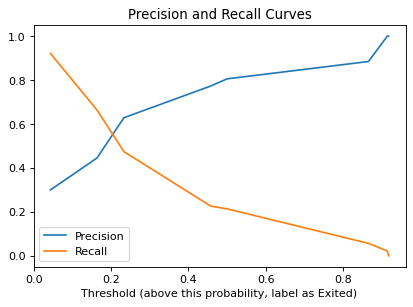

In [188]:
precision_curve_dc, recall_curve_dc, threshold_curve_dc = precision_recall_curve(y_test, dc.predict_proba(X_testsc)[:,1] )
plt.figure(dpi=80)
plt.plot(threshold_curve_dc, precision_curve_dc[1:],label='Precision')
plt.plot(threshold_curve_dc, recall_curve_dc[1:], label='Recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as Exited)');
plt.title('Precision and Recall Curves');

## Random Forest

In [57]:
rf_range = np.arange(1,40)
md_range = np.arange(2,15)
param_grid_rf = dict(n_estimators = rf_range, max_depth=md_range)
fbeta_scorer = make_scorer(fbeta_score, beta=0.25)

In [58]:
gridcv_rf = GridSearchCV(RandomForestClassifier(random_state=711), param_grid_rf, cv=5, scoring = fbeta_scorer)
gridcv_rf.fit(X_trainsc, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=711),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])},
             scoring=make_scorer(fbeta_score, beta=0.25))

In [59]:
print("Best params: ", gridcv_rf.best_params_)
print("Best estimator: ", gridcv_rf.best_estimator_)
print("Best score: ", gridcv_rf.best_score_)

Best params:  {'max_depth': 5, 'n_estimators': 28}
Best estimator:  RandomForestClassifier(max_depth=5, n_estimators=28, random_state=711)
Best score:  0.8012472650759366


In [60]:
rf = RandomForestClassifier(n_estimators=gridcv_rf.best_params_['n_estimators'],max_depth =gridcv_rf.best_params_['max_depth'], random_state=711)
rf.fit(X_trainsc, y_train)

rf_train_score = rf.score(X_trainsc, y_train)
rf_test_score = rf.score(X_testsc,y_test)
print("RF Training Score: {:.2f}%".format(100*rf_train_score))
print("RF Test Score: {:.2f}%".format(100*rf_test_score))

RF Training Score: 85.56%
RF Test Score: 83.70%


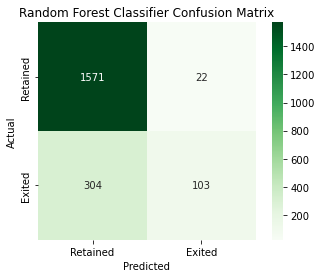

In [61]:
rf_confusion = confusion_matrix(y_test, rf.predict(X_testsc))
sns.heatmap(rf_confusion, cmap="Greens", annot=True, square=True,fmt='g', 
            xticklabels=['Retained', 'Exited'], 
            yticklabels=['Retained', 'Exited'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Classifier Confusion Matrix');
plt.savefig('RF_Confusion.png')

In [62]:
rf_fbeta = fbeta_score(y_test, rf.predict(X_testsc), beta=0.25)
rf_precision = precision_score(y_test, rf.predict(X_testsc))
rf_recall = recall_score(y_test, rf.predict(X_testsc))
print("RF F-Beta:{:.3f} RF Precision:{:.3f} RF Recall:{:.3f}".format(rf_fbeta, rf_precision, rf_recall))

RF F-Beta:0.727 RF Precision:0.824 RF Recall:0.253


In [63]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_testsc)[:,1])

In [64]:
col = pd.Series(X.columns)
coef_df = pd.DataFrame(rf.feature_importances_.reshape(-1,1), columns=['Coefficients'])
coef_df = pd.concat([coef_df,col], axis=1)
coef_df = coef_df.rename({0:"Features"}, axis =1)
coef_df.sort_values('Coefficients', ascending = False)

,Coefficients,Features
1,0.420250,Age
3,0.333974,NumOfProducts
5,0.082613,IsActiveMember
8,0.069595,Germany
0,0.024544,CreditScore
11,0.023639,Zero
7,0.016638,Male
6,0.013875,EstimatedSalary
2,0.005854,Tenure
9,0.003768,Spain


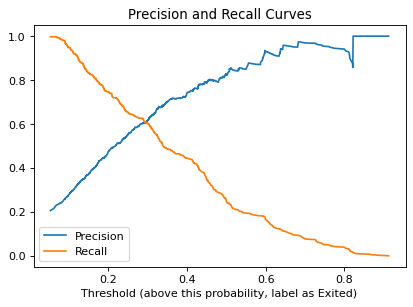

In [123]:
precision_curve_rf, recall_curve_rf, threshold_curve_rf = precision_recall_curve(y_test, rf.predict_proba(X_testsc)[:,1] )
plt.figure(dpi=80)
plt.plot(threshold_curve_rf, precision_curve_rf[1:],label='Precision')
plt.plot(threshold_curve_rf, recall_curve_rf[1:], label='Recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as Exited)');
plt.title('Precision and Recall Curves');

## XGBOOST

In [242]:
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)

In [65]:
import xgboost
from sklearn.model_selection import RandomizedSearchCV

In [528]:
xgb = xgboost.XGBClassifier(use_label_encoder=False, eval_metric='auc')

In [529]:
xgb.fit(X_trainsc, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='auc',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [530]:
xgb_train_score = xgb.score(X_trainsc, y_train)
xgb_test_score = xgb.score(X_testsc,y_test)
print("RF Training Score: {:.2f}%".format(100*xgb_train_score))
print("RF Test Score: {:.2f}%".format(100*xgb_test_score))

RF Training Score: 94.39%
RF Test Score: 85.15%


In [130]:
param_grid_xgb = {'n_estimators' : np.arange(50,250,50),
'subsample' : np.arange(0.4,1.2,0.2),
'max_depth' : np.arange(1,5),
'learning_rate' : np.arange(0.1,1,0.1),
'min_samples_split' : np.arange(1,6)}

# param_grid_xgb = dict(n_estimators = n_estimators, max_depth=max_depth)
fbeta_scorer = make_scorer(fbeta_score, beta=1)



In [531]:
params = {
    "max_depth": [2, 3, 4, 5, 6, 8, 10, 12, 15],
    "learning_rate": [0.5, 0.10, 0.15, 0.20, 0.25, 0.30],
    "min_child_weight": [1, 3, 5, 7],
    "gamma": [0.0, 0.1, 0.2, 0.3, 0.4],
    "colsample_bytree": [0.3, 0.4, 0.5, 0.7]
}



In [563]:
random_cv = RandomizedSearchCV(xgb, param_distributions=params, n_iter=10, scoring='precision', n_jobs=1, cv=5, verbose=3)



In [564]:
random_cv.fit(X_trainsc,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.25, max_depth=4, min_child_weight=3;, score=0.729 total time=   0.1s
[CV 2/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.25, max_depth=4, min_child_weight=3;, score=0.744 total time=   0.1s
[CV 3/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.25, max_depth=4, min_child_weight=3;, score=0.741 total time=   0.1s
[CV 4/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.25, max_depth=4, min_child_weight=3;, score=0.742 total time=   0.1s
[CV 5/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.25, max_depth=4, min_child_weight=3;, score=0.769 total time=   0.1s
[CV 1/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.1, max_depth=4, min_child_weight=1;, score=0.743 total time=   0.1s
[CV 2/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.1, max_depth=4, min_child_weight=1;, score=0.797 total time=   0.1s
[CV 3/5] END colsample_b

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           eval_metric='auc', gamma=0,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimators=1...
                                           reg_alpha=0, reg_lambda=1,
                                           scale_pos_weight=1, subs

In [565]:
print("Best params: ", random_cv.best_params_)
print("Best estimator: ", random_cv.best_estimator_)
print("Best score: ", random_cv.best_score_)

Best params:  {'min_child_weight': 1, 'max_depth': 4, 'learning_rate': 0.1, 'gamma': 0.3, 'colsample_bytree': 0.5}
Best estimator:  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, eval_metric='auc',
              gamma=0.3, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=4, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)
Best score:  0.7828856748889971


In [566]:
xgb_class = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, eval_metric='auc',
              gamma=0.3, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=4, min_child_weight=1, 
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [567]:
xgb_class.fit(X_trainsc, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, eval_metric='auc',
              gamma=0.3, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=4, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [568]:
xgb_train_score = xgb_class.score(X_trainsc, y_train)
xgb_test_score = xgb_class.score(X_testsc,y_test)
print("RF Training Score: {:.2f}%".format(100*xgb_train_score))
print("RF Test Score: {:.2f}%".format(100*xgb_test_score))

RF Training Score: 87.46%
RF Test Score: 85.85%


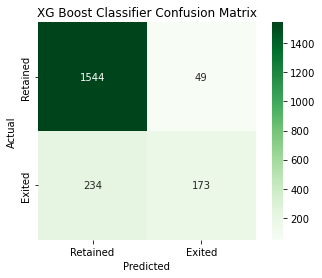

In [569]:
xgb_confusion = confusion_matrix(y_test, xgb_class.predict(X_testsc))
sns.heatmap(xgb_confusion, cmap="Greens", annot=True, square=True,fmt='g', 
            xticklabels=['Retained', 'Exited'], 
            yticklabels=['Retained', 'Exited'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XG Boost Classifier Confusion Matrix');
plt.savefig('XGB_Confusion.png')

In [595]:
xgb_fbeta = fbeta_score(y_test, xgb_class.predict(X_testsc), beta=1)
xgb_precision = precision_score(y_test, xgb_class.predict(X_testsc))
xgb_recall = recall_score(y_test, xgb_class.predict(X_testsc))
print("XGB F Beta:{:.3f} XGB Precision:{:.3f} XGB Recall:{:.3f}".format(xgb_fbeta,xgb_precision,xgb_recall))

XGB F Beta:0.550 XGB Precision:0.779 XGB Recall:0.425


In [571]:
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, xgb_class.predict_proba(X_testsc)[:,1])

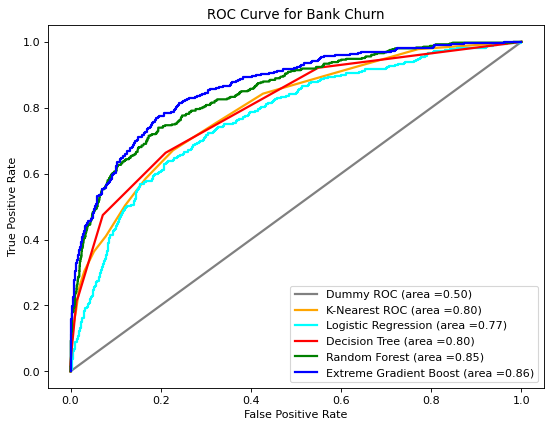

In [613]:
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(fpr_dum, tpr_dum,lw=2, c= 'gray',label = "Dummy ROC (area ={:.2f})".format(roc_auc_score(y_test, dummy_class.predict_proba(X_testsc)[:,1])))
plt.plot(fpr_knn, tpr_knn,lw=2, c='orange', label = "K-Nearest ROC (area ={:.2f})".format(roc_auc_score(y_test, knn.predict_proba(X_testsc)[:,1])))
plt.plot(fpr_lr, tpr_lr,lw=2, c='cyan',label = "Logistic Regression (area ={:.2f})".format(roc_auc_score(y_test, lr.predict_proba(X_testsc)[:,1])))
plt.plot(fpr_dc, tpr_dc,lw=2, c='red', label = "Decision Tree (area ={:.2f})".format(roc_auc_score(y_test, dc.predict_proba(X_testsc)[:,1])))
plt.plot(fpr_rf, tpr_rf,lw=2, c='green',label = "Random Forest (area ={:.2f})".format(roc_auc_score(y_test, rf.predict_proba(X_testsc)[:,1])))
plt.plot(fpr_xgb, tpr_xgb,lw=2, c='blue',label = "Extreme Gradient Boost (area ={:.2f})".format(roc_auc_score(y_test, xgb_class.predict_proba(X_testsc)[:,1])))
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Bank Churn');
plt.legend(loc='lower right')
plt.savefig("ROC Curve.png")

In [573]:
print("Log-loss on dummy: {:6.4f}".format(log_loss(y_test, dummy_class.predict_proba(X_testsc))))
print("Log-loss on knn: {:6.4f}".format(log_loss(y_test, knn.predict_proba(X_testsc))))
print("Log-loss on logit: {:6.4f}".format(log_loss(y_test, lr.predict_proba(X_testsc))))
print("Log-loss on dc: {:6.4f}".format(log_loss(y_test, dc.predict_proba(X_testsc))))
print("Log-loss on rf: {:6.4f}".format(log_loss(y_test, rf.predict_proba(X_testsc))))
print("Log-loss on xgb: {:6.4f}".format(log_loss(y_test, xgb_class.predict_proba(X_testsc))))

Log-loss on dummy: 0.5052
Log-loss on knn: 0.5401
Log-loss on logit: 0.4280
Log-loss on dc: 0.3921
Log-loss on rf: 0.3748
Log-loss on xgb: 0.3403


In [559]:
test_prob = xgb_class.predict_proba(X_testsc)[:,1]
len(test_prob[test_prob>0.5])

232

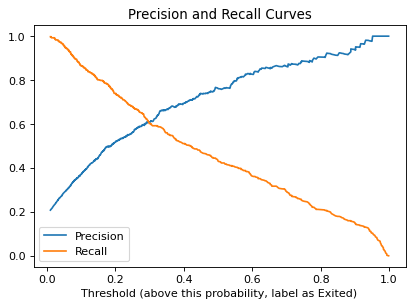

In [560]:
precision_curve_xgb, recall_curve_xgb, threshold_curve_xgb = precision_recall_curve(y_test, xgb_class.predict_proba(X_testsc)[:,1] )
plt.figure(dpi=80)
plt.plot(threshold_curve_xgb, precision_curve_xgb[1:],label='Precision')
plt.plot(threshold_curve_xgb, recall_curve_xgb[1:], label='Recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as Exited)');
plt.title('Precision and Recall Curves');

In [561]:
col = pd.Series(X.columns)
coef_df = pd.DataFrame(xgb_class.feature_importances_.reshape(-1,1), columns=['Coefficients'])
coef_df = pd.concat([coef_df,col], axis=1)
coef_df = coef_df.rename({0:"Features"}, axis =1)
coef_df.sort_values('Coefficients', ascending = False)

,Coefficients,Features
3,0.301691,NumOfProducts
5,0.153213,IsActiveMember
1,0.140803,Age
8,0.124919,Germany
11,0.080166,Zero
7,0.038118,Male
10,0.034427,Mid
0,0.027669,CreditScore
6,0.027434,EstimatedSalary
4,0.025975,HasCrCard


## Thresholding Analysis

In [363]:
X_test_res = X_test.reset_index()
X_test_res = X_test_res.merge(df[['Balance','CustomerId']], how='left', left_on="RowNumber", right_on="RowNumber")

In [364]:
xgb_pred = pd.Series(xgb_class.predict_proba(X_testsc)[:,1], name='Pred')
X_test_res = pd.concat([X_test_res,xgb_pred],axis=1, ignore_index = False)

In [366]:
X_test_res = X_test_res.merge(y_test, how='left', left_on="RowNumber", right_on="RowNumber")

In [517]:
X_res = X_test_res[X_test_res['Pred']>0.9].sort_values(['Pred','Balance'], ascending = False)

In [382]:
X_res

,RowNumber,CreditScore,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Male,Germany,Spain,Mid,Zero,Balance,CustomerId,Pred,Exited
150,8,376,29,4,4,1,0,119346.88,0,1,0,1,0,115046.74,15656148,0.998629,1
74,2615,546,58,3,4,1,0,128881.87,0,1,0,1,0,106458.31,15640846,0.997863,1
407,6832,469,52,8,3,0,0,150093.32,0,1,0,0,0,139493.25,15696989,0.994660,1
1754,7534,630,51,0,3,0,0,88372.69,0,1,0,1,0,108449.23,15592773,0.994600,1
1164,1006,521,52,5,3,0,0,53793.10,1,1,0,1,0,116497.31,15701602,0.993649,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,2269,659,56,9,1,1,0,99504.03,0,0,0,0,0,123785.24,15777553,0.809396,1
1605,529,572,48,3,1,1,0,38411.79,0,1,0,0,0,152827.99,15653849,0.804545,1
1018,7207,753,47,1,1,1,0,197444.69,0,1,0,0,0,131160.85,15770995,0.803924,0
1807,536,608,59,1,1,1,0,70649.64,1,0,0,0,1,0.00,15776780,0.801417,1


In [449]:
bins = [0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1]
X_test_res['binned'] = pd.cut(X_test_res['Pred'], bins)
X_test_res

,RowNumber,CreditScore,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Male,Germany,Spain,Mid,Zero,Balance,CustomerId,Pred,Exited,binned
0,4440,613,21,7,1,1,1,36560.51,0,0,0,1,0,105627.95,15696539,0.037715,0,"(0.0, 0.1]"
1,1372,611,43,8,1,1,0,114996.33,0,0,0,1,0,64897.75,15792722,0.449746,0,"(0.4, 0.5]"
2,5600,579,50,5,1,0,1,192146.63,0,1,0,1,0,117721.02,15635870,0.844946,1,"(0.8, 0.9]"
3,5313,712,48,8,2,1,0,183235.33,0,0,1,0,1,0.00,15726178,0.160832,0,"(0.1, 0.2]"
4,8755,776,43,4,2,0,1,162137.50,0,0,0,0,1,0.00,15619045,0.067825,0,"(0.0, 0.1]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,3008,602,33,5,1,0,1,180716.10,1,0,0,0,0,164704.38,15697997,0.057294,1,"(0.0, 0.1]"
1996,3731,683,38,3,1,0,0,15378.75,1,0,1,0,0,126152.84,15689152,0.126126,0,"(0.1, 0.2]"
1997,2955,538,33,5,2,1,0,126962.41,0,0,0,0,1,0.00,15775562,0.038199,0,"(0.0, 0.1]"
1998,2911,596,33,2,1,0,0,63142.12,1,0,0,0,0,139451.67,15746139,0.108537,0,"(0.1, 0.2]"


In [502]:
X_res_2 = X_test_res.groupby('binned',as_index=False)['Exited'].mean()
X_res_3 = X_test_res.groupby('binned', as_index=False)['Pred'].mean()
X_res_2.iloc[:,1]

0    0.051158
1    0.129380
2    0.308642
3    0.386555
4    0.445783
5    0.591837
6    0.589286
7    0.872340
8    0.823529
9    0.976744
Name: Exited, dtype: float64

In [523]:
X_res_3.iloc[:,1]

0    0.045174
1    0.141227
2    0.245670
3    0.348119
4    0.445194
5    0.552085
6    0.642945
7    0.748874
8    0.847393
9    0.958252
Name: Pred, dtype: float32

In [521]:
X_res

,RowNumber,CreditScore,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Male,Germany,Spain,Mid,Zero,Balance,CustomerId,Pred,Exited,binned
150,8,376,29,4,4,1,0,119346.88,0,1,0,1,0,115046.74,15656148,0.998629,1,"(0.9, 1.0]"
74,2615,546,58,3,4,1,0,128881.87,0,1,0,1,0,106458.31,15640846,0.997863,1,"(0.9, 1.0]"
407,6832,469,52,8,3,0,0,150093.32,0,1,0,0,0,139493.25,15696989,0.994660,1,"(0.9, 1.0]"
1754,7534,630,51,0,3,0,0,88372.69,0,1,0,1,0,108449.23,15592773,0.994600,1,"(0.9, 1.0]"
1164,1006,521,52,5,3,0,0,53793.10,1,1,0,1,0,116497.31,15701602,0.993649,1,"(0.9, 1.0]"
1780,5116,533,49,1,3,1,0,69409.37,0,1,0,1,0,102286.60,15727317,0.993133,1,"(0.9, 1.0]"
1893,6256,547,55,4,3,1,0,16922.28,1,1,0,1,0,111362.76,15589017,0.992926,1,"(0.9, 1.0]"
1351,2510,655,50,10,4,1,0,179267.94,0,0,0,0,1,0.00,15689341,0.992536,1,"(0.9, 1.0]"
1465,8104,479,51,1,3,1,0,86128.21,1,1,0,1,0,107714.74,15740223,0.991080,1,"(0.9, 1.0]"
128,3205,547,50,3,3,0,1,177747.03,1,1,0,1,0,81290.02,15603942,0.990409,1,"(0.9, 1.0]"


In [518]:
X_res[['CustomerId','Age','Balance',"Tenure",'Pred','Exited']].head(30)

,CustomerId,Age,Balance,Tenure,Pred,Exited
150,15656148,29,115046.74,4,0.998629,1
74,15640846,58,106458.31,3,0.997863,1
407,15696989,52,139493.25,8,0.994660,1
1754,15592773,51,108449.23,0,0.994600,1
1164,15701602,52,116497.31,5,0.993649,1
1780,15727317,49,102286.60,1,0.993133,1
1893,15589017,55,111362.76,4,0.992926,1
1351,15689341,50,0.00,10,0.992536,1
1465,15740223,51,107714.74,1,0.991080,1
128,15603942,50,81290.02,3,0.990409,1


## Cost Modeling

In [396]:
new_pred_ones = np.ones(shape=(2000,))

conf = confusion_matrix(y_test, new_pred_ones)

total_cost = (conf[0,1] * 150) + (conf[1,1] * 150) + conf[1,0] * 750
total_savings = conf[1,1] * 750

net_gain = total_savings - total_cost
print(net_gain)

conf

5250


array([[   0, 1593],
       [   0,  407]])

In [407]:
new_pred_zeros = np.zeros(shape=(2000,))

conf = confusion_matrix(y_test, new_pred_zeros)

total_cost = (conf[0,1] * 150) + (conf[1,1] * 150) + conf[1,0] * 750
total_savings = conf[1,1] * 750

net_gain = total_savings - total_cost
print(net_gain)

conf


-305250


array([[1593,    0],
       [ 407,    0]])

In [607]:
def model_cost(model):

    savings = []
    idx = []
    for i in np.arange(0,1,0.01):
        y_predict = (model.predict_proba(X_testsc)[:, 1] >= i)
        cf_matrix = confusion_matrix(y_test, y_predict)
        total_cost = (cf_matrix[0][1] * 150) + (cf_matrix[1][1] * 150) + cf_matrix[1][0] * 750
        total_savings = cf_matrix[1][1] * 750
        savings.append(total_savings - total_cost)
        idx.append(i)

    print('Max savings = {:d}'.format(max(savings)))
    return (savings,idx)

In [606]:
dum_savings,dum_idx = model_cost(dummy_class)

Max savings = 5250


In [605]:
knn_savings,knn_idx = model_cost(knn)

Max savings = 55800


In [597]:
lr_savings,lr_idx = model_cost(lr)

Max savings = 48450


In [598]:
dc_savings,dc_idx = model_cost(dc)

Max savings = 69750


In [599]:
rf_savings,rf_idx = model_cost(rf)

Max savings = 77700


In [600]:
xgb_savings,xgb_idx = model_cost(xgb_class)

Max savings = 92100


In [601]:
res_list = list(zip(xgb_savings,xgb_idx))
res_df = pd.DataFrame(res_list, columns =['gains', 'idx'])

In [593]:
def make_confusion_matrix(model, threshold=0.1):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_val) does this automatically with a threshold of 0.5)
    y_predict = (model.predict_proba(X_testsc)[:, 1] >= threshold)
    exited_confusion = confusion_matrix(y_test, y_predict)
    plt.figure(dpi=80)
    sns.heatmap(exited_confusion, cmap="Greens", annot=True, square=True, fmt='d',
           xticklabels=['Retained', 'Exited'],
           yticklabels=['Retained', 'Exited']);
    plt.title('XG Boost Confusion Matrix');
    plt.xlabel('Prediction')
    plt.ylabel('Actual')

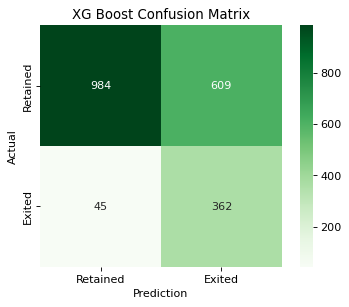

In [602]:
make_confusion_matrix(xgb_class)

In [603]:
res_df.head(30)

,gains,idx
0,5250,0.00
1,6450,0.01
2,29850,0.02
3,43200,0.03
4,58800,0.04
5,72000,0.05
6,81300,0.06
7,82350,0.07
8,83550,0.08
9,88650,0.09


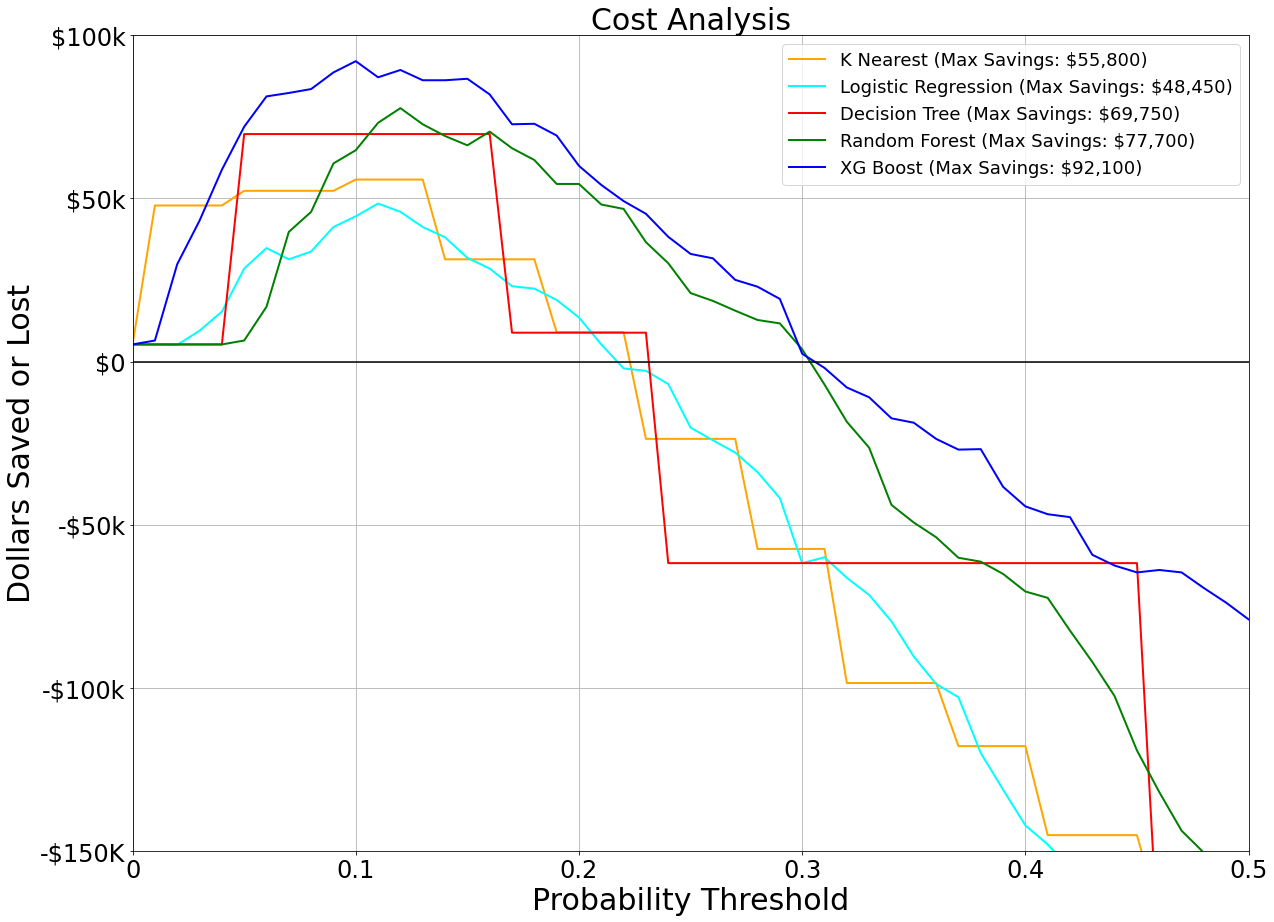

In [608]:
fig, ax = plt.subplots(figsize=(20, 15))
# plt.plot(dum_idx, dum_gains, label='Logistic Regression', color='purple', lw=2)
plt.plot(knn_idx, knn_savings, label='K Nearest (Max Savings: ${:,})'.format(max(knn_savings)), color='orange', lw=2)
plt.plot(lr_idx, lr_savings, label='Logistic Regression (Max Savings: ${:,})'.format(max(lr_savings)), color='cyan', lw=2)
plt.plot(dc_idx, dc_savings, label='Decision Tree (Max Savings: ${:,})'.format(max(dc_savings)), color='red', lw=2)
plt.plot(rf_idx, rf_savings, label='Random Forest (Max Savings: ${:,})'.format(max(rf_savings)), color='green', lw=2)
plt.plot(xgb_idx, xgb_savings, label='XG Boost (Max Savings: ${:,})'.format(max(xgb_savings)), color='blue', lw=2)
ax.axhline(y=0, color='black')
plt.grid()
ax.set_xbound(lower=0, upper=0.5)
ax.set_ybound(lower=-150000, upper=100000)
ax.set_yticklabels( ['-$150K','-$100k','-$50k', '$0', '$50k', '$100k'], fontsize=24)
ax.set_xticklabels(['0', '0.1', '0.2', '0.3', '0.4', '0.5'], fontsize=24)
plt.xlabel('Probability Threshold', fontsize=30)
plt.ylabel('Dollars Saved or Lost',fontsize=30)
plt.legend(fontsize=18)
plt.title('Cost Analysis',fontsize=30);
plt.savefig('Cost_Analysis.png')